# Import Libraries

In [1]:
import math
from math import *
import statistics as st
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data set

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Date,Price
0,1-Jun-20,67.59
1,2-Jun-20,67.59
2,3-Jun-20,68.47
3,4-Jun-20,68.38
4,8-Jun-20,68.38


# Part(a): Creating a time index
First you need to create a time index. Take time index value corresponding to
the first price value of NDB stock in the data file as t = 0. Then you need to
create the time index accordingly (that is, the time index value for the second
price value is t = 2, the time index value for the third price value is t = 3 ,... ).

In [3]:
df['index'] = np.arange(0, 0+len(df.Date))

In [4]:
df.head(5)

,Date,Price,index
0,1-Jun-20,67.59,0
1,2-Jun-20,67.59,1
2,3-Jun-20,68.47,2
3,4-Jun-20,68.38,3
4,8-Jun-20,68.38,4


In [5]:
df.shape

(473, 3)

# Part(b): 
Suppose price values of NDB follows a Geometric Brownian motion. Then, what
is the distribution of log returns?


# Part(c): Calculate the log returns
Using the log returns, estimate drift parameter µGB and scale parameter σ corresponding the geometric Brownian.

In [16]:
log_return = []
for i in range((len(df.index)-1)):
    log_return = log_return + [math.log(df.Price[i+1]/df.Price[i])]
    
mu = st.mean(log_return)
sd = st.stdev(log_return)
mu, sd

(-0.001248133707915038, 0.01827075215226598)

In [22]:
mu_GB = mu + ((sd**2)/2) # Drift parameter
sigma = sd # Scale parameter
mu_GB, sd

(-0.0010812235158102722, 0.01827075215226598)

# Part(e): Simulate 1000 possible sample paths for closing price
Simulate 1000 possible sample paths for closing price of NDB relevant to the
next 20 days.

In [23]:
def BrownianG(m,T,N,sigma,mu_GB,w_0,GB=True):
    # time step
    dt = T/N
    # creating an array to store simulated values
    x = np.zeros((m, N+1))
    # inital values of x
    x[:, 0] = w_0
    x_0 = x[:, 0]
    # generate random numbers from normal distribution
    r = norm.rvs(size = x_0.shape + (N, ), loc = (mu_GB-((sigma**2)/2))*dt, scale = sigma*sqrt(dt))
    # compute Brownian Motion by taking cumulative sum of random samples
    np.cumsum(r, axis = -1, out = x[:, 1:])
    x[:, 1:] = w_0*np.exp(x[:, 1:])
    
    return x

In [24]:
y = BrownianG(1000,20,150,sigma,mu_GB,df.Price[472],GB=True)

In [25]:
y

array([[37.5       , 37.49173857, 37.04984096, ..., 35.43357465,
        35.85660852, 35.69532006],
       [37.5       , 37.27728638, 37.27497568, ..., 35.21146236,
        35.54482126, 34.83869297],
       [37.5       , 37.13007662, 36.7448274 , ..., 38.08292059,
        38.13929671, 38.00493648],
       ...,
       [37.5       , 37.01835562, 37.6007475 , ..., 32.24353481,
        32.0023502 , 31.71506389],
       [37.5       , 37.31213069, 37.48000177, ..., 35.60468652,
        35.70410839, 35.4834797 ],
       [37.5       , 37.46627964, 37.73161932, ..., 36.09705424,
        36.11604481, 36.57936691]])

# Part(f): Plot the sample paths for next 20 days


In [26]:
def BrownianPlot(y,T):
    # number of steps
    N = y.shape[1]
    # length of time step
    dt = T/(N-1)
    # creating time axis
    t = np.linspace(0.0, N*dt, N)
    
    for k in range(y.shape[0]):
        plt.plot(t, y[k])
    
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('Price')
    plt.show()

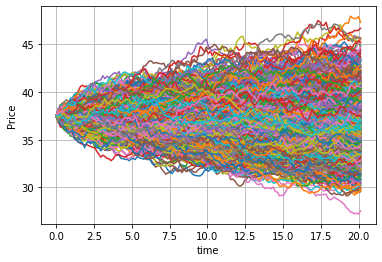

In [27]:
BrownianPlot(y,20)

# Part(g): Box plot for the possible closing price values

In [28]:
def BrownianEnd(y,T,loc):
    # number of steps
    N = y.shape[1]
    # length of a step
    dt = T/(N-1)
    # the position of the array corresponding to the given location
    pos = int(loc/dt)
    # boxplot
    plt.boxplot(y[:, pos])
    plt.show

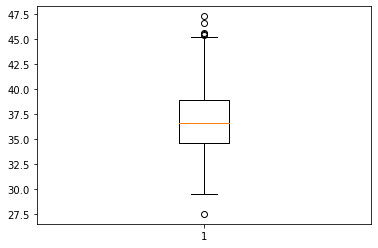

In [29]:
BrownianEnd(y,20,20)

# Part(h): Probability of the closing prices


In [30]:
df_GBM = pd.DataFrame(y.T)
ending_values_GBM = df_GBM.loc[150]

# probability of Price
len(ending_values_GBM[(ending_values_GBM>120) & (ending_values_GBM<135)])/len(ending_values_GBM)

0.0

In [31]:
# probability of Price
len(ending_values_GBM[(ending_values_GBM>25) & (ending_values_GBM<40)])/len(ending_values_GBM)

0.85

# Part(i): 95% prediction interval

In [17]:
np.percentile(ending_values_GBM, [2.5, 97.5])

array([31.24955401, 43.48249316])